# Data Science HW #5
Jason Barbarosh

## Import Libraries

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import statsmodels.api as sm
import math
import seaborn as sb

%matplotlib inline

## Import the data

In [2]:
df = pd.read_csv("PSID.txt", sep="\t")
df.head()

,ER60001,ER60002,ER60017,ER60018,ER60167,ER62366,ER62506,ER64612,ER64810,ER65349,ER65459
0,1,8474,57,2,5,4,0,5,1,60704,11
1,1,1428,41,2,5,3,0,5,1,45084,12
2,1,4738,39,1,0,2,0,1,1,52000,10
3,1,6780,38,1,0,4,0,5,1,35000,13
4,1,7304,34,1,5,4,0,1,1,31560,11


In [3]:
df.describe()

,ER60001,ER60002,ER60017,ER60018,ER60167,ER62366,ER62506,ER64612,ER64810,ER65349,ER65459
count,9048.0,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9.048000e+03,9048.000000
mean,1.0,4534.549072,45.654730,1.329244,1.408378,2.554377,0.264920,4.106764,1.692418,6.954035e+04,14.570955
std,0.0,2620.837601,16.528586,0.469965,2.241426,1.086979,0.889743,1.701723,1.316793,9.456179e+04,10.308990
min,1.0,1.000000,17.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,-2.200000e+04,0.000000
25%,1.0,2263.750000,32.000000,1.000000,0.000000,2.000000,0.000000,5.000000,1.000000,2.400000e+04,12.000000
50%,1.0,4531.500000,43.000000,1.000000,0.000000,2.000000,0.000000,5.000000,1.000000,4.931250e+04,13.000000
75%,1.0,6803.250000,58.000000,2.000000,5.000000,3.000000,0.000000,5.000000,2.000000,9.021125e+04,16.000000
max,1.0,9080.000000,102.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5.250100e+06,99.000000


Records which contain a feature code that denote ‘missing’ or ‘refused to answer’ should be dropped from the dataset. Categorical features should be transformed to discrete values, and features should be normalized. Once this step is complete, we should apply logistic regression model. In this homework, please spend some time on analysis and discussion . If its easier, you can submit your discussion as a separate .txt, .pdf or word document rather than including the discussion in the .ipython code.

To begin, you’ll need to clean the data set: (1) remove observations in which the respondent
did not know the answer, refused to answer, or skipped the question, (2) if the variable is
binary, specify it as 0 or 1, (3) if the variable is ordered or categorical, discretize the variable
by creating indicator variables for each category, (4) transform large numbers to make them
usable


## Clean the data

In [4]:
# Rename the columns
names = {
    "ER60001": "Release_Num",
    "ER60002": "ID",
    "ER60017": "Age",
    "ER60018": "Sex",
    "ER60167": "Work",
    "ER62366": "Health_Now",
    "ER62506": "Health_Young",
    "ER64612": "NoHealthIns",
    "ER64810": "Race",
    "ER65349": "Income",
    "ER65459": "Educ"
}

for col in df.columns:
    if col in names:
        df = df.rename(columns = {col:names[col]})
df.head()

,Release_Num,ID,Age,Sex,Work,Health_Now,Health_Young,NoHealthIns,Race,Income,Educ
0,1,8474,57,2,5,4,0,5,1,60704,11
1,1,1428,41,2,5,3,0,5,1,45084,12
2,1,4738,39,1,0,2,0,1,1,52000,10
3,1,6780,38,1,0,4,0,5,1,35000,13
4,1,7304,34,1,5,4,0,1,1,31560,11


In [5]:
def reAssign(data, i, j, k):
    l = []
    for x in data:
        if x == i:
            l.append(j)
        else:
            l.append(k)
    return l

In [6]:
# Remove extraneous variables

# Clean Age
df = df[df.Age != 999]

# Clean Sex
df.Sex = reAssign(df.Sex, 2, 0, 1)

# Clean Work
df = df[df.Work != 8]
df = df[df.Work != 9]
df = df[df.Work != 0]
df.Work = reAssign(df.Work, 5, 0, 1)

# Clean Health_Now 
df = df[df.Health_Now != 8]
df = df[df.Health_Now != 9]

# Clean Health_Young
df = df[df.Health_Young != 8]
df = df[df.Health_Young != 9]
df = df[df.Health_Young != 0]

# Clean NoHealthIns
df = df[df.NoHealthIns != 8]
df = df[df.NoHealthIns != 9]
df.NoHealthIns = reAssign(df.NoHealthIns, 5, 0, 1)

# Clean Race
df = df[df.Race != 9]

# Clean Income
df = df[df.Income != 0]

In [7]:
df.head()

,Release_Num,ID,Age,Sex,Work,Health_Now,Health_Young,NoHealthIns,Race,Income,Educ
9,1,7098,20,1,1,3,3,0,1,135700,12
12,1,987,64,1,0,5,5,0,1,20394,9
165,1,945,36,1,0,1,1,1,1,6000,17
177,1,5242,89,0,0,5,1,0,1,25672,15
345,1,8086,27,0,1,2,3,0,1,25276,14


In [8]:
# Transform Variables

# Log income
df.Income = df.Income.apply(np.log)

# Discretize categorical vars
df = pd.get_dummies(df, columns=["Health_Now", "Health_Young", "Race"], drop_first=True)

In [9]:
df.head()

,Release_Num,ID,Age,Sex,Work,NoHealthIns,Income,Educ,Health_Now_2,Health_Now_3,...,Health_Now_5,Health_Young_2,Health_Young_3,Health_Young_4,Health_Young_5,Race_2,Race_3,Race_4,Race_5,Race_7
9,1,7098,20,1,1,0,11.818202,12,0,1,...,0,0,1,0,0,0,0,0,0,0
12,1,987,64,1,0,0,9.922996,9,0,0,...,1,0,0,0,1,0,0,0,0,0
165,1,945,36,1,0,1,8.699515,17,0,0,...,0,0,0,0,0,0,0,0,0,0
177,1,5242,89,0,0,0,10.153156,15,0,0,...,1,0,0,0,0,0,0,0,0,0
345,1,8086,27,0,1,0,10.137611,14,1,0,...,0,0,1,0,0,0,0,0,0,0


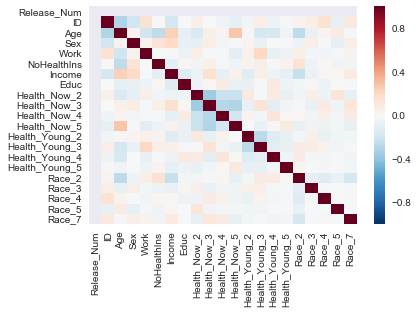

In [17]:
sb.heatmap(df.corr())  

In [10]:
from sklearn.model_selection import train_test_split

target = pd.DataFrame(df["NoHealthIns"])
features = df[["Age", "Sex", "Income", "Race_2", "Race_3", "Race_4", "Race_5", "Race_7",
                         "Work", "Health_Now_2", "Health_Now_3", "Health_Now_4", "Health_Now_5",
                         "Health_Young_2", "Health_Young_3", "Health_Young_4", "Health_Young_5", "Educ"]]

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size = .15)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

est = sm.Logit(y_train, X_train).fit()
print (est.summary())

         Current function value: 0.511090
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            NoHealthIns   No. Observations:                  201
Model:                          Logit   Df Residuals:                      182
Method:                           MLE   Df Model:                           18
Date:                Sun, 12 Nov 2017   Pseudo R-squ.:                  0.1361
Time:                        20:21:04   Log-Likelihood:                -102.73
converged:                      False   LL-Null:                       -118.92
                                        LLR p-value:                   0.01983
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2629      1.683      0.156      0.876      -3.036       3.562
Age               -0.0360      0.011     -3.177      

/Users/Jason/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [11]:
print(np.round(np.exp(est.params), 3))

const             1.301
Age               0.965
Sex               2.478
Income            0.904
Race_2            1.659
Race_3            0.000
Race_4            1.862
Race_5            0.000
Race_7            0.389
Work              0.956
Health_Now_2      0.875
Health_Now_3      1.768
Health_Now_4      0.965
Health_Now_5      1.680
Health_Young_2    1.309
Health_Young_3    1.395
Health_Young_4    0.427
Health_Young_5    0.000
Educ              1.003
dtype: float64


In [12]:
p = est.params
#excellent = 1 / (1 + np.exp(-(p.const + p.Health_Young_2 + p.Health_Young_3 + p.Health_Young_4 + p.Health_Young_5)))

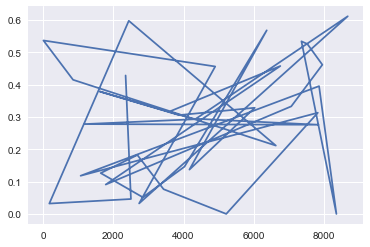

In [19]:
plt.plot(est.predict(X_test))

In [15]:
print ("The goal of this assignment is to create a probability model that analyzes the effect of childhood health status \
on being without health insurance later in life. I used a logistic regression for my analysis. This is a special \
type of nonlinear regression which is designed for binary dependant variables. It measures the probability that Y = 1, \
where Y = 1 denoting not having health insurance. Logistic regression, or logit model, outputs probabilities from the \
cumulative standard logistic distribution function.")

The goal of this assignment is to create a probability model that analyzes the effect of childhood health status on being without health insurance later in life. I used a logistic regression for my analysis. This is a special type of nonlinear regression which is designed for binary dependant variables. It measures the probability that Y = 1, where Y = 1 denoting not having health insurance. Logistic regression, or logit model, outputs probabilities from the cumulative standard logistic distribution function.
